In [1]:
# Data acquisition and processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Ai libraries 
import tensorflow as tf
# Visualization libraries
from tensorflow.contrib.tensorboard.plugins import projector
from tensorflow.examples.tutorials.mnist import input_data
# Opperating system dependent functions
import os

In [2]:
# Set up embeding constants
#Set log_dir to local directory to save embeding data -> load to tensorboard
LOG_DIR = r'/Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/log'
NUM_EMBEDINGS = 400
ROWS = 28
COLUMNS = 28
IMAGE_SIZE = (ROWS, COLUMNS)
VISUALIZATION_NAME = 'fm_embeding'
# Map label values to their database representation classes.

item_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [3]:
#Fashion MINST data imported from https://github.com/zalandoresearch/fashion-mnist as cdv sc
test_data = np.array(pd.read_csv(r'/Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/A1/data/fashion-mnist_test.csv'), dtype='float32')
test_label = test_data[:NUM_EMBEDINGS, 0]
test_image = test_data[:NUM_EMBEDINGS, 1:] / 255



In [4]:
# setup the write and embedding tensor
summary_w = tf.summary.FileWriter(LOG_DIR)
embedding_var = tf.Variable(test_image, name=VISUALIZATION_NAME)

In [5]:
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

# configure embeding and image path / image dimensions
embedding.metadata_path = os.path.join(LOG_DIR, 'metadata.tsv')
embedding.sprite.image_path = os.path.join(LOG_DIR, 'sprite.png')
embedding.sprite.single_image_dim.extend([ROWS, COLUMNS])
# configure emdedings for visualization
projector.visualize_embeddings(summary_w, config)

In [6]:
with tf.Session() as sesh:
    # initialize all global variables in created tf graph
    sesh.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.save(sesh, os.path.join(LOG_DIR, 'model.ckpt'))

In [8]:
# # Helper to create sprite images
# Creates an individual sprite image for for writing to file.
def spritemaker(image, label,item_names, index):
    dimension = int(np.sqrt(test_image.shape[0]))
    spriteimage: ndarray = np.ones((COLUMNS * dimension, ROWS * dimension))

    for i in range(dimension):
        for j in range(dimension):

            item_names.append(item_name[int(label[index])])

            spriteimage[
                i * COLUMNS: (i + 1) * COLUMNS,
                j * ROWS: (j + 1) * ROWS
            ] = image[index].reshape(28, 28) * -1 + 1

            index += 1

    return spriteimage




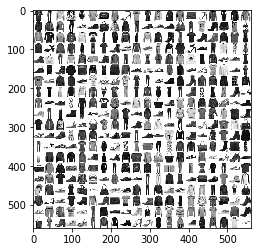

In [9]:
# create the sprite image and the metadata file
# save index of images and item_names for analysis
index = 0
item_names = []
# 
sprite_image = spritemaker(test_image, test_label,item_names,index) 
with open(embedding.metadata_path, 'w') as meta:
    meta.write('Index\tLabel\n')
    for index, item_name in enumerate(item_names):
        meta.write('{}\t{}\n'.format(index, item_name))  
# For testing to see that images have been properly loaded.
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')
plt.imshow(sprite_image, cmap='gray')
plt.show()

Run tensorboard using: tensorboard <logdir>  --port=8008 (can leave port empty if 6006 is open)